<a href="https://www.kaggle.com/code/fr3shk/bellabeat-with-python?scriptVersionId=111902190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://i.imgur.com/FR2vtHH.jpg)

<font size="5"><b>Introduction</b></font>

<font size="3">Welcome to the Bellabeat data analysis case study! Bellabeat is a successful small company, but they have the potential to become a larger player in the global [smart device](https://en.wikipedia.org/wiki/Smart_device) market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.</font>

<font size="5"><b>Stakeholders and Products</b></font>
    
<font size="3"><b>Stakeholders</b></font>
    
* <font size="3"><b>Urška Sršen</b>: Bellabeat’s cofounder and Chief Creative Officer</font>
    
* <font size="3"><b>Sando Mur</b>: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team</font>
    
* <font size="3"><b>Bellabeat marketing analytics team</b>: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.</font>

<font size="3"><b>Products</b></font>

* <font size="3"><b>Bellabeat app</b>: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.</font>

![](https://hipandhealthy.com/wp-content/uploads/2019/01/Bellabeat-the-LEAF-App.jpg)


* <font size="3"><b>Leaf</b>: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.</font>

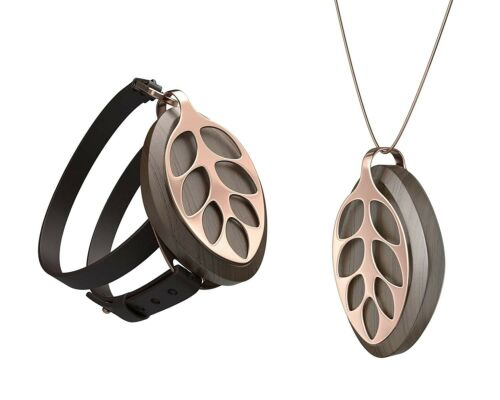

* <font size="3"><b>Time</b>: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.</font>

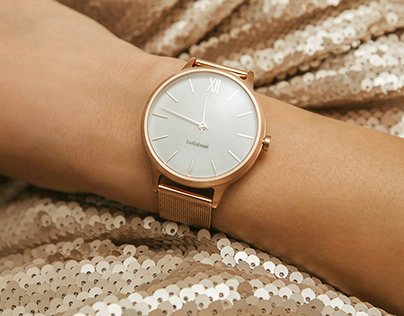

* <font size="3"><b>Spring</b>: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.</font>

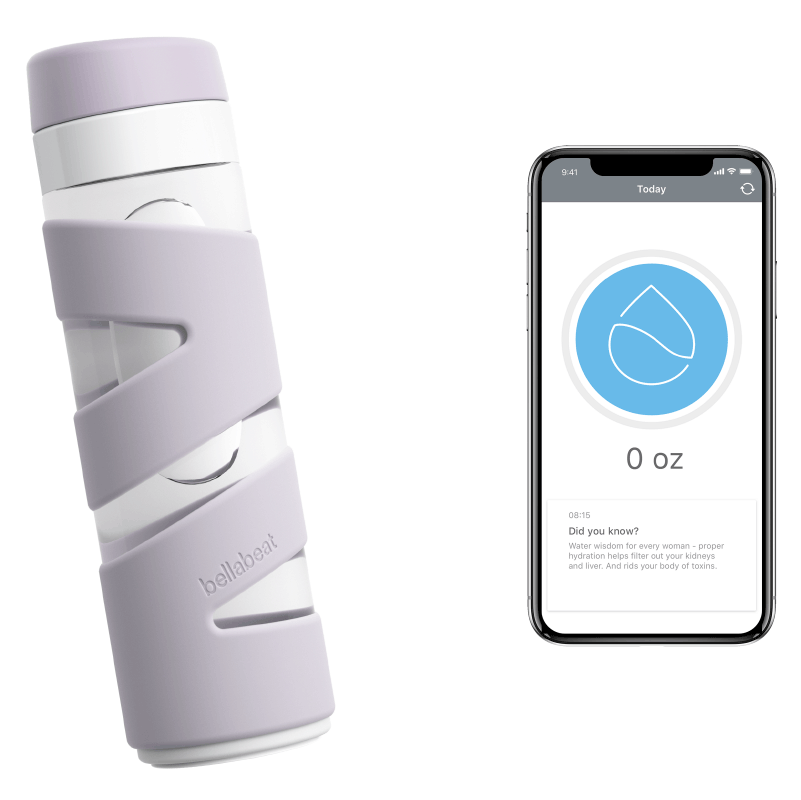

<font size="5"><b>About the company</b></font>
    
<font size="3">Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.</font>
<font size="3">By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on [their website](https://bellabeat.com/). The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.</font>

<font size="5"><b>Business Task</b></font>

<font size="3">Focus on a Bellabeat product and analyze smart device usage data in order to gain insights into how people are already using their smart devices. Then, using this information, present high-level recommendations for how these trends can inform Bellabeat marketing strategy.</font>

<font size="5"><b>Data Source</b></font>

<font size="3">[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius): 
* <font size="3">This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.</font>
* <font size="3">Sršen explains that this data set might have some limitations, adding other data to help address those limitations is recommended.</font>


------------------------------------------------------------------------------------------------------------------------------------------------

<font size ="5"><b>Preparing & Processing Data with PYTHON</b></font>

In [1]:
#Importing any necessary packages, and assigning alises.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm #provides classes and functions for the estimation of many different statistical models.
import missingno as msno
import seaborn as sns
from matplotlib.pyplot import figure #adjusting sizes of visuals
from scipy.interpolate import make_interp_spline #makes line graph lines smoother
import datetime as dt #for date changes.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

In [2]:
#Importing data frames using pandas read_csv.

daily_activity = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
met_minute = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
sleep_day = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hr_steps = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hr_calories = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

<font size="5"><b>Step 1: Understanding the Data</b></font>

<font size="3">Getting an overview of each data frame</font>

In [3]:
daily_activity.head()
# Key variables: ActivityDate, TotalSteps, TotalDistance, Calories.
# Distance and Activity is broken down into intesities.
# Distance is measured in kilometers.

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
met_minute.head()
# MET stands for the metabolic equivalent of task. 
# One MET is the amount of energy used while sitting quietly. 
# Physical activities may be rated using METs to indicate their intensity.
# For example, reading may use about 1.3 METs while running may use 8-9 METs. 
# METs can also be translated into light, moderate, and vigorous intensities of exercise. 
# More information can be found on https://www.healthline.com/health/what-are-mets.

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [5]:
sleep_day.head()
# recorded total sleep time in minutes and total time in bed.

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [6]:
weight_log.head()
# Weight is given in both kg and lbs.
# Body Mass Index (BMI) is a person’s weight in kilograms divided by the square of height in meters. 
# A high BMI can indicate high body fatness. 
# BMI screens for weight categories that may lead to health problems, but it does not diagnose the body fatness or health of an individual.
# More on BMI can be found on https://www.cdc.gov/healthyweight/assessing/bmi/index.html.

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [7]:
# Noticed there are Null values in 'Fat' column.
empty_cells_count = weight_log.isnull().sum()
empty_cells_count[:]

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [8]:
hr_steps.head()
# Steps taken by hour. This will be useful to measure activity during a 24 hour cycle.

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [9]:
hr_calories.head()
# Calories burned by hour.

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


<font size="5"><b>Step 2: Data Type Check</b></font>

In [10]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [11]:
met_minute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [12]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [13]:
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [14]:
hr_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [15]:
hr_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


<font size="3"><b>Observations</b></font>
* <font size="3">In 'daily_activity', the "ActivityDate" column needs to be converted from and object to a datetime format. This will provide oprtunities to aggregate this column.</font>
* <font size="3">The primary key in all dataframes is the "Id".</font>
* <font size="3">All columns are numerical values, excluding the Primary key in all dataframes, and the boolian in 'weight_log'.

<font size="5"><b>Step 3: Descriptive Statistics</b></font>

<font size="3">The next step involves learning more about the statistics. This will allow a better understanding of the datasets and their content.</font>

In [16]:
daily_activity.nunique()

Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
dtype: int64

In [17]:
met_minute.nunique()

Id                   33
ActivityMinute    44160
METs                136
dtype: int64

In [18]:
sleep_day.nunique()

Id                     24
SleepDay               31
TotalSleepRecords       3
TotalMinutesAsleep    256
TotalTimeInBed        242
dtype: int64

In [19]:
weight_log.nunique()

Id                 8
Date              56
WeightKg          34
WeightPounds      34
Fat                2
BMI               36
IsManualReport     2
LogId             56
dtype: int64

In [20]:
hr_steps.nunique()

Id                33
ActivityHour     736
StepTotal       2222
dtype: int64

In [21]:
hr_calories.nunique()

Id               33
ActivityHour    736
Calories        442
dtype: int64

<font size="3"><b>Observations</b></font>

* <font size="3">There seems to be more than 30 participants that have logged their information on the app.</font>
* <font size="3">The weight dataset only contains information from eight users and could be a problem when it comes to making recommendations for the general public. But statistical tests can still be made to make predictions later on.</font>

<font size="5"><b>Step 4: Inspecting the rows and columns of each dataset</b></font>

In [22]:
daily_activity.shape

(940, 15)

In [23]:
met_minute.shape

(1325580, 3)

In [24]:
sleep_day.shape

(413, 5)

In [25]:
weight_log.shape

(67, 8)

In [26]:
hr_steps.shape

(22099, 3)

In [27]:
hr_calories.shape

(22099, 3)

<font size="3"><b>Observations</b></font>

* <font size="3">The amount of rows differ majorly in each data set. This tells me that not all users have been logging information in each dataset.</font>
* <font size="3">Calories and steps in hours have the same row and column count, which will be perfect when planning to merge data frames.</font>

<font size= "5"><b>Step 5: Data Wrangling, Merging, and Cleaning</b></font>

In [28]:
# re-naming the date columnes to make it easier for merging datasets.

daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})

sleep_day = sleep_day.rename(columns={'SleepDay': 'Date'})

hr_steps = hr_steps.rename(columns={'ActivityHour' : 'Time'})

hr_calories = hr_calories.rename(columns={'ActivityHour' : 'Time'})

# Changing the data type to datetime for date calculations.

daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])

sleep_day['Date'] = pd.to_datetime(sleep_day['Date'])

hr_steps['Time'] = pd.to_datetime(hr_steps['Time'])

hr_calories['Time'] = pd.to_datetime(hr_calories['Time'])

weight_log['Date'] = pd.to_datetime(weight_log['Date'])

In [29]:
# Merging daily_activity and sleep_day datasets
df_merged = pd.merge(daily_activity, sleep_day, on='Date')

# Renaming certain columns for readability
df_merged = df_merged.rename(columns={'Id_x' : 'Id'})
df_merged = df_merged.rename(columns={'Id_y' : 'Id_Sleep'})

# create new list to re-arrange columns
new_cols = ['Id','Date','Day_of_Week','TotalSteps','TotalDistance','Calories','TotalSleepRecords',
            'TotalMinutesAsleep','TotalTimeInBed','TrackerDistance','LoggedActivitiesDistance',
            'VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance',
            'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']

# reindex function to rearrange columns based on "new_cols"
df_merged = df_merged.reindex(columns=new_cols)
df_merged.head()

,Id,Date,Day_of_Week,TotalSteps,TotalDistance,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,2016-04-12,NaN,13162,8.5,1985,1,327,346,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728
1,1503960366,2016-04-12,NaN,13162,8.5,1985,3,750,775,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728
2,1503960366,2016-04-12,NaN,13162,8.5,1985,1,503,546,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728
3,1503960366,2016-04-12,NaN,13162,8.5,1985,1,274,469,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728
4,1503960366,2016-04-12,NaN,13162,8.5,1985,1,501,541,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728


In [30]:
# Creating 'day_of_week' column which will allow aggregation at the day of the week level.
df_merged['Day_of_Week'] = df_merged['Date'].dt.day_name()

hr_steps['Day_of_Week'] = hr_steps['Time'].dt.day_name()

In [31]:
# Merging hourly_steps and hourly_calories datasets
hr_merged = pd.merge(hr_steps, hr_calories, on=['Time', 'Id'])
hr_merged.head()

,Id,Time,StepTotal,Day_of_Week,Calories
0,1503960366,2016-04-12 00:00:00,373,Tuesday,81
1,1503960366,2016-04-12 01:00:00,160,Tuesday,61
2,1503960366,2016-04-12 02:00:00,151,Tuesday,59
3,1503960366,2016-04-12 03:00:00,0,Tuesday,47
4,1503960366,2016-04-12 04:00:00,0,Tuesday,48


--------------------------------------------------------------------------------------------------------------------------------------------------

<font size="5"><b>Analyzing The Data</b></font>

<font size ="3">In this section, the following questions will help guide the analysis process:</font>
* <font size ="3">What are some trends in smart device usage?</font>
* <font size ="3">How could these trends apply to Bellabeat customers?</font>
* <font size ="3">How could these trends help influence Bellabeat marketing strategy?</font>

<font size="3"><b>Exploring the relationship of user's Active time vs distance</b></font>

<font size="3">In our 'df_merged' data, there are four intesity measures that breakdown both variables:</font>

* <font size="3">'VeryActiveMinutes' = 'VeryActiveDistance'</font>
* <font size="3">'FairlyActiveMinutes' = 'ModeratelyActiveDistance'</font>
* <font size="3">'VeryLightlyActiveMinutes' = 'LightActiveDistance'</font>
* <font size="3">'SedentaryMinutes' = 'SedentaryActiveDistance'</font>

<font size="3">Plotting each intesity in a scatter plot (Distance vs. Time(in minutes)) to visualize the relationship between the variables.</font>

<AxesSubplot:xlabel='SedentaryMinutes', ylabel='SedentaryActiveDistance'>

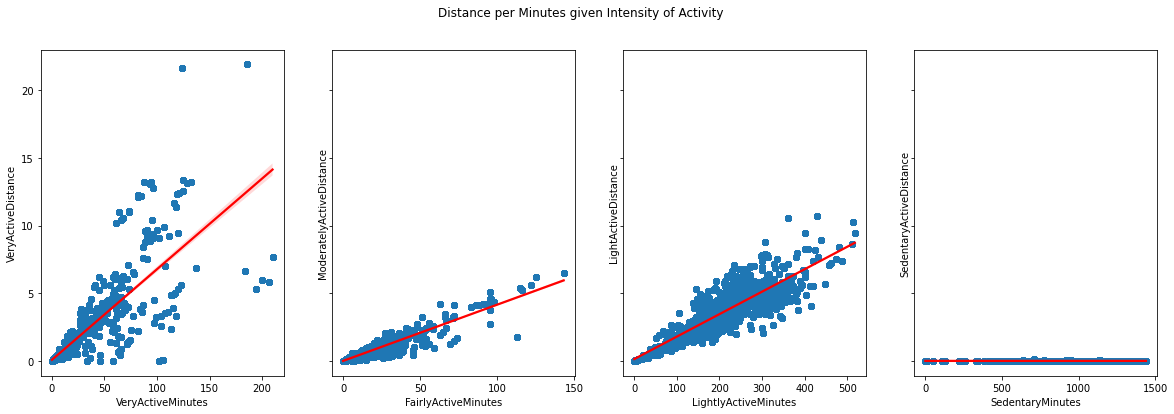

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Distance per Minutes given Intensity of Activity')

fontparams = {'font.size': 12, 'font.family':'Times', 'font.style':'italic'}
plt.rcParams.update(fontparams) # Updating font appearance in all graphs 

sns.regplot(data = df_merged, x = 'VeryActiveMinutes', y = 'VeryActiveDistance',
            ax=axes[0],line_kws={"color": "red"})

sns.regplot(data = df_merged, x = 'FairlyActiveMinutes', y = 'ModeratelyActiveDistance'
            , ax=axes[1],line_kws={"color": "red"})

sns.regplot(data = df_merged, x = 'LightlyActiveMinutes', y = 'LightActiveDistance',
            ax=axes[2],line_kws={"color": "red"})

sns.regplot(data = df_merged, x = 'SedentaryMinutes', y = 'SedentaryActiveDistance',
            ax=axes[3],line_kws={"color": "red"})

<font size="3"><b>Observations</b></font>

* <font size="3">The 'VeryActiveDistances' show higher distance travelled at shorter time periods, which indactes the users are sprinting/jogging at a higher pace.
* <font size="3">'LightlyActiveMinutes' displays greater distances and longer durations than 'FairlyActiveMinutes'.</font>
* <font size="3">Needless to say that 'SedentaryMinutes' travelled no distance because they are at rest.</font>
    
<font size="3">In all four graphs, its obvious that there is a correlation with the intesity of the ativity and the distance+times travelled.</font>
    
<font size="3"><b>Exploring Total Calories burned by the amount of steps taken</b></font>

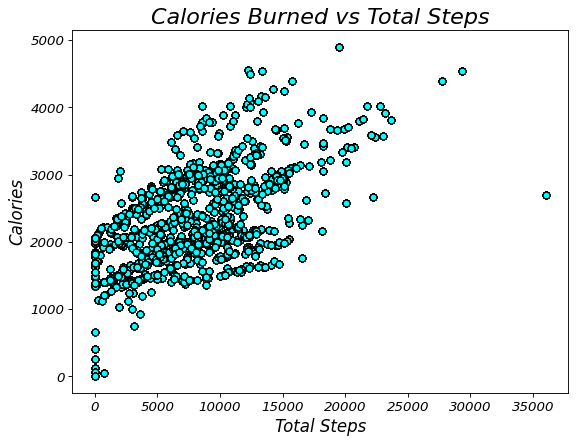

In [33]:
#Visualizing the total calories burned vs total steps taken.

figure(figsize=(8, 6), dpi=80)
x= df_merged['TotalSteps']
y= df_merged['Calories']

plt.scatter(x,y, color="cyan", edgecolor = "black")
plt.title("Calories Burned vs Total Steps",fontsize=20)
plt.xlabel('Total Steps',fontsize=15)
plt.ylabel('Calories',fontsize=15)

plt.show()

<font size="3"><b>Observations</b></font>

* <font size="3">The amount of calories burned in a day increases as the user takes more steps.</font> 
* <font size="3">In this relationship, the y-intercept represents the amount of burned calories in a day when no steps are taken.</font>
* <font size="3">User's are burning calries when sedentary/at rest.</font>

<font size="3">Its worth mentioning that the y-intercept represents the amount of calories users are burning when sedentary (RMR). According to the [Healthline.com](https://www.healthline.com/health/calories-burned-sleeping), RMR corresponds to the basal metabolic rate (BMR).</font>
   
<font size="3"><b>Basal metabolic rate (BMR) and resting metabolic rate (RMR)</b> both measure the amount of energy, in calories.</font>

<font size="3">This value can be calculated using the following equation:</font>
   
> <font size="3">66 + (6.2 x weight) + (12.7 x height) – (6.76 x age) = For men</font>
>     
> <font size="3">655.1 + (4.35 x weight) + (4.7 x height) – (4.7 x age) = For women</font>

In [34]:
#applying the OLS(Ordinary least squares) Regression to estimate the relationship of Calories burned and total steps.

x1= df_merged['TotalSteps']
y= df_merged['Calories']

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     6675.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:04:33   Log-Likelihood:                -98126.
No. Observations:               12625   AIC:                         1.963e+05
Df Residuals:                   12623   BIC:                         1.963e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.3887      9.232    182.779      0.000    1669.293    1705.485
TotalSteps     0.0818      0.001     81.700      0.000       0.080       0.084
==============================================================================
Omnibus:                       77.876   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.265
Skew:                           0.155   Prob(JB):                     3.05e-19
Kurtosis:                       3.256   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

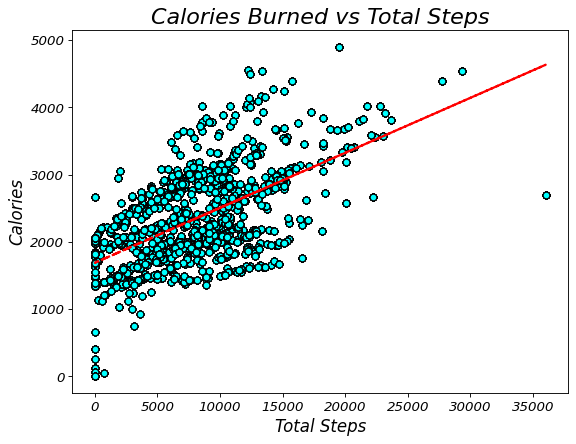

In [35]:
#With the data available, we can plot the regression line by entering the coefficients in the equation y = mx + b.

figure(figsize=(8, 6), dpi=80)
x1= df_merged['TotalSteps']
y= df_merged['Calories']

plt.scatter(x1, y, color="cyan", edgecolor = "black")
yhat = 0.0818*x1 + (1687.3887) # equation for slope: y = mx + b
fig = plt.plot(x1,yhat, lw=2, c='red', label = 'regression line', ls = '--')
plt.title("Calories Burned vs Total Steps",fontsize=20)
plt.xlabel('Total Steps',fontsize=15)
plt.ylabel('Calories',fontsize=15)
plt.show()

<font size="3">From the data we see that the predicted BMR is 1687.3887(y-intercept). We can further get information on the BMR of our users if we filter only the data points with zero, for zero steps taken, and get the statistics on the Calories distribution.</font>

In [36]:
# statistical data on 'TotalSteps' and 'Calories'.
df_merged[df_merged['TotalSteps']==0]['Calories'].describe()

count    1019.000000
mean     1693.929342
std       525.774421
min         0.000000
25%      1497.000000
50%      1841.000000
75%      1981.000000
max      2664.000000
Name: Calories, dtype: float64

<font size="3">The data shows the minimum being zero. This is likely an outlier, because our equation proves that we still burn calories when sedentary.</font> 

In [37]:
#Inspecting the data where calories is zero.
df_merged[df_merged['Calories']==0]

,Id,Date,Day_of_Week,TotalSteps,TotalDistance,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
8447,8253242879,2016-04-30,Saturday,0,0.0,0,1,404,425,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8448,8253242879,2016-04-30,Saturday,0,0.0,0,1,124,142,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8449,8253242879,2016-04-30,Saturday,0,0.0,0,1,722,961,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8450,8253242879,2016-04-30,Saturday,0,0.0,0,1,573,607,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8451,8253242879,2016-04-30,Saturday,0,0.0,0,1,237,382,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8452,8253242879,2016-04-30,Saturday,0,0.0,0,1,490,516,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8453,8253242879,2016-04-30,Saturday,0,0.0,0,2,409,430,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8454,8253242879,2016-04-30,Saturday,0,0.0,0,1,322,353,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8455,8253242879,2016-04-30,Saturday,0,0.0,0,1,479,501,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440
8456,8253242879,2016-04-30,Saturday,0,0.0,0,2,775,843,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440


<font size="3"><b>Observation</b></font>

<font size="3">The data shows that SedentaryMinutes is 1440 mins for all users whos calories = 0. 

<font size="3">When coverting to hours:</font>
> <font size="3">1440 mins/60 mins = 24hours</font>

<font size="3">This indicates that the fitness tracker may have been off, or lost connection for the entire day.</font>

In [38]:
# removing the outliers. 

# note the original row and column count.
df_merged.shape
#(12625, 19)

#Removing rows with calories = 0.
df_merged = df_merged.loc[df_merged["Calories"] != 0]
df_merged.shape
#(12582, 19), 43 rows removed.

#Pulling the statistical data to confirm changes.
df_merged.describe()

,Id,TotalSteps,TotalDistance,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
count,1.258200e+04,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000
mean,4.855147e+09,7703.529328,5.535697,2323.311556,1.121920,419.261167,458.565252,5.521285,0.105872,1.513112,0.572031,3.372040,0.001594,21.338499,13.707121,194.861230,991.263074
std,2.420164e+09,5095.612170,3.936117,698.453205,0.350205,118.539778,127.349007,3.918957,0.615395,2.689939,0.883548,2.038228,0.007348,33.148417,20.048637,108.680037,297.434021
min,1.503960e+09,0.000000,0.000000,52.000000,1.000000,58.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3844.000000,2.670000,1841.000000,1.000000,361.000000,403.000000,2.670000,0.000000,0.000000,0.000000,1.980000,0.000000,0.000000,0.000000,129.250000,730.000000
50%,4.445115e+09,7443.000000,5.280000,2151.000000,1.000000,432.000000,463.000000,5.280000,0.000000,0.210000,0.240000,3.390000,0.000000,4.000000,7.000000,200.000000,1057.000000
75%,6.962181e+09,10742.000000,7.730000,2797.000000,1.000000,490.000000,526.000000,7.720000,0.000000,2.090000,0.810000,4.800000,0.000000,32.000000,20.000000,266.000000,1226.000000
max,8.877689e+09,36019.000000,28.030001,4900.000000,3.000000,796.000000,961.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000


<font size="3"><b>Exploring User's Activity Throughout the Week</b></font>

/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


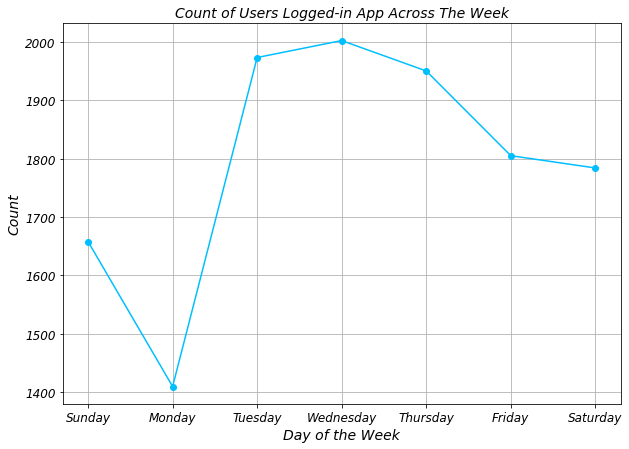

In [39]:
#Re-arranging days of the week.
df_merged['Day_of_Week'] = pd.Categorical(df_merged['Day_of_Week'],
               categories = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
               ordered=True)

#counting users by weekday.
count_by_weekday = df_merged['Day_of_Week'].value_counts()
count_by_weekday = count_by_weekday.sort_index()

plt.figure(figsize=(10,7))
plt.plot(count_by_weekday, color='deepskyblue', marker='o')
plt.title('Count of Users Logged-in App Across The Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

<font size="3"><b>Observation</b></font>

<font size="3">This graph indicates more users are logged into the app on weekdays, compared to weekends. This doesn't mean that users are more active during these times. Further analysis will be needed to explore the behavour throughout the week.</font>

<font size="3"><b>Exploring Steps taken Throughout the Week</b></font>

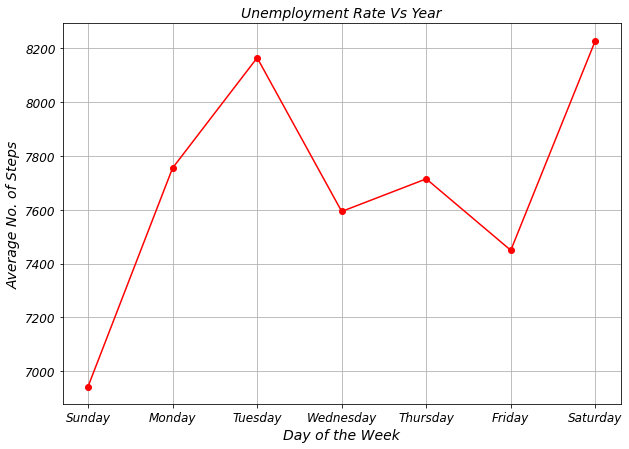

In [40]:
df_merged_avg = df_merged.groupby('Day_of_Week', as_index=True)['TotalSteps'].mean()

plt.figure(figsize=(10,7))
plt.plot(df_merged_avg, color='red', marker='o')
plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average No. of Steps', fontsize=14)
plt.grid(True)
plt.show()

<font size="3"><b>Observation</b></font>

* <font size="3">The average user are more active on Saturdays, and Tuesdays.</font>
* <font size="3">There is no correlation to users logged-in on the app and how active they are during the week.</font>

<font size="3"><b>Exploring The Activity Throughout the Day</b></font>

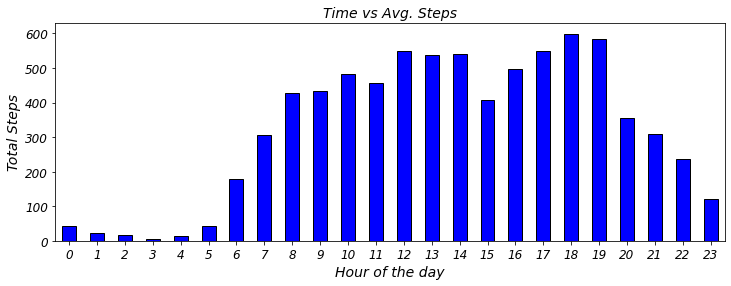

In [41]:
fig, axs = plt.subplots(figsize=(12, 4))
hr_merged.groupby(hr_merged["Time"].dt.hour)['StepTotal'].mean(
).plot(kind='bar',rot=0, ax=axs, color='b', edgecolor = "black")
 
plt.title("Time vs Avg. Steps", fontsize=14)
plt.xlabel("Hour of the day", fontsize=14)
plt.ylabel("Total Steps", fontsize=14)
plt.show()

<font size="3"><b>Ovservations</b></font>
* <font size="3">Users Activity is highest around 6pm in the evening.</font>
* <font size="3">Lowest activity is at 3am.
    
<font size="3"><b>Exploring The Calories Burned Throughout the Day</b></font>

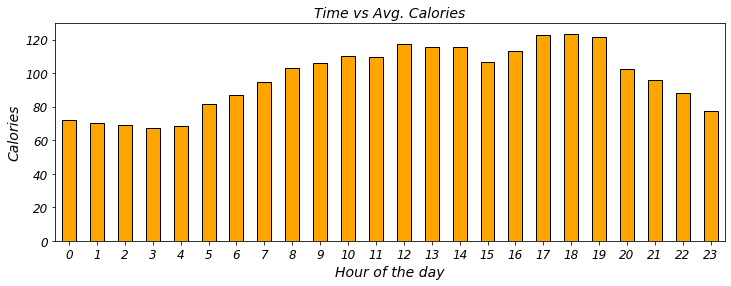

In [42]:
fig, axs = plt.subplots(figsize=(12, 4))
hr_merged.groupby(hr_merged['Time'].dt.hour)['Calories'].mean(
).plot(kind='bar', rot=0, ax=axs, color='orange', edgecolor = "black")

plt.title("Time vs Avg. Calories", fontsize=14)
plt.xlabel("Hour of the day", fontsize=14)
plt.ylabel("Calories", fontsize=14)
plt.show()

<font size="3"><b>Ovservations</b></font>
* <font size="3">There is a correlation with calories burned and the amount of steps taken.</font>

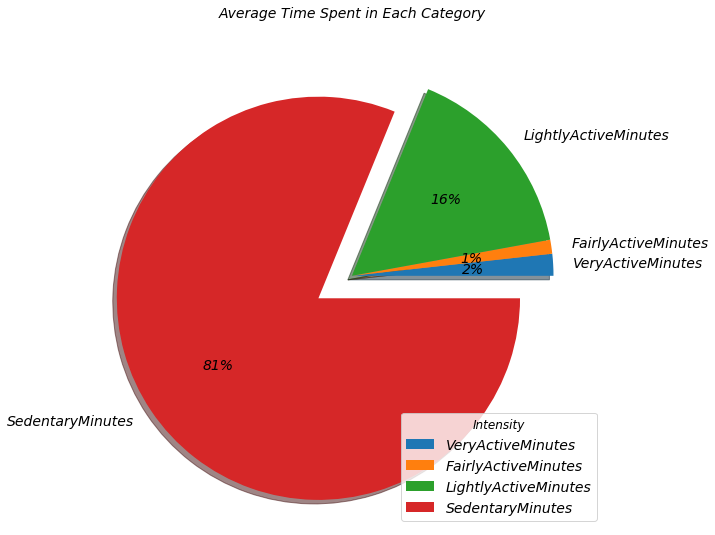

In [43]:
#plotting the average minutes spent in each category.
minutes_categories = df_merged[['VeryActiveMinutes', 'FairlyActiveMinutes',
                                  'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

fig1, ax1 = plt.subplots(figsize=(12, 7))
fig1.subplots_adjust(0.3,0,1,1)

mylabels = ["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]
myexplode = [0, 0,0,0.2]

plt.pie(minutes_categories, labels = mylabels, explode = myexplode, autopct='%1.0f%%', startangle=0, shadow = True, textprops={'fontsize': 14})

plt.legend(title = "Intensity", fontsize=14, loc="lower right")
plt.title('Average Time Spent in Each Category', fontsize=14)
plt.show() 

<font size="3"><b>Observation</b></font>

<font size="3">The Department of [Health and Human Services](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/exercise/faq-20057916#:~:text=As%20a%20general%20goal%2C%20aim,your%20risk%20of%20metabolic%20problems.) recommends at least 30 minutes of moderate daily physical activity. It is also said that reducing sitting time is important to avoid one's risk of developing metabolic problems. We can conclude from our data that, even though our users are being very active for over 30 minutes every day, they are still spending an enormous amount of time being sedentary, which could result in future health issues.</font>

<font size="3"><b>Exploring Sleep Throughout the Week</b></font>

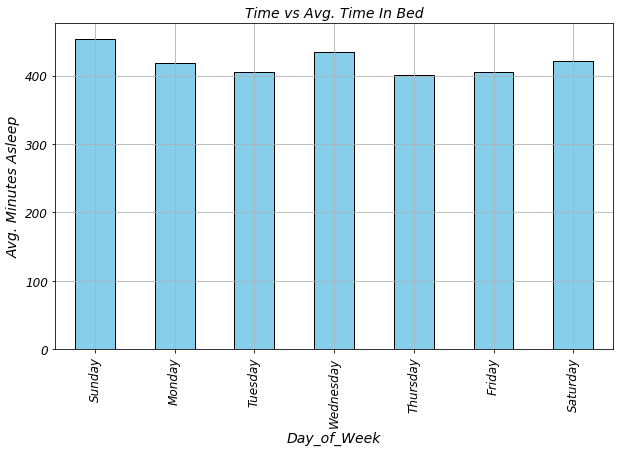

In [44]:
df_sleep = df_merged.groupby('Day_of_Week', as_index=True)['TotalMinutesAsleep'].mean()

plt.figure(figsize=(10,6))
df_sleep.plot(kind='bar',color=['skyblue'], edgecolor = "black")
plt.xlabel("Day_of_Week",fontsize=14)
plt.ylabel("Avg. Minutes Asleep",fontsize=14)
plt.title("Time vs Avg. Time In Bed",fontsize=14)
plt.grid(True)
plt.show()

<font size="3"><b>Ovservations</b></font>
* <font size="3">This comes to no surprise that on average, users tend to sleep the most on weekends.</font>
* <font size="3">Sunday haveing the highest average sleep duration, and Thursdays with the least amount of sleep.</font>

<font size="3"><b>Exploring Sleep by Categories</b></font>

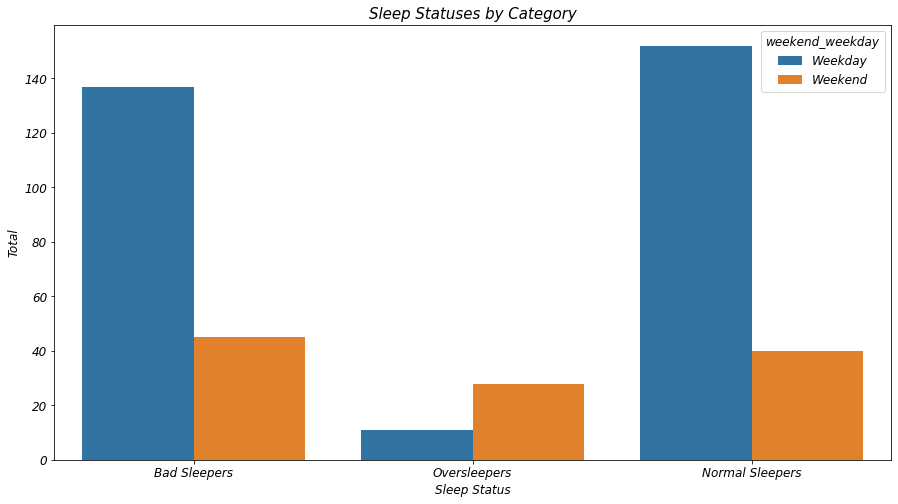

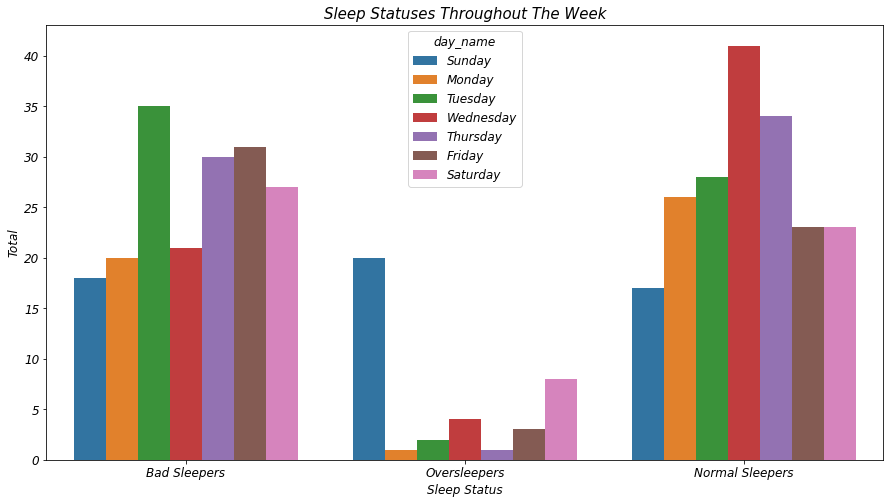

In [45]:
#further exporing user's sleep patterns.
# importing the sleepDay_merged dataset.
sleep_day = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

sleep_day['TotalMinutesAsleep'] = pd.to_timedelta(sleep_day['TotalMinutesAsleep'], unit = 'm') #converting to standard minutes
sleep_day['TotalMinutesAsleep'] = sleep_day['TotalMinutesAsleep'].astype('timedelta64[m]') #correcting data type
sleep_day['TotalHoursAsleep'] = sleep_day['TotalMinutesAsleep'] / 60 #converting to hours

#rounding to nearest hundredths  
sleep_day['TotalHoursAsleep'] = sleep_day['TotalHoursAsleep'].round(2)

#add sleep status
sleep_day['SleepStatus'] = np.where(sleep_day['TotalHoursAsleep'] < 7, 'Bad Sleepers', 
         (np.where( sleep_day['TotalHoursAsleep'] > 9, 'Oversleepers', 'Normal Sleepers'))
        ) 
#used ternary operator. link for future me's reference: https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions
#np.select article by dataquest: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])

sleep_day['day_name'] = sleep_day['SleepDay'].dt.day_name()
sleep_day['weekend_weekday'] = np.where(sleep_day['SleepDay'].dt.dayofweek > 4, 'Weekend', 'Weekday')

sleep_day.head()

#Plotting by categories
fig_dims = (15,8)
fig, ax = plt.subplots(figsize = fig_dims)
overview = sns.countplot(
    data = sleep_day,
    x = sleep_day['SleepStatus'],
    hue = 'weekend_weekday',
    ax = ax)

overview.set_title('Sleep Statuses by Category', fontsize = 15)
overview.set_xlabel('Sleep Status', fontsize = 12)
overview.set_ylabel('Total', fontsize = 12)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.show()

#by Day of the week

sleep_day['day_name'] = pd.Categorical(sleep_day['day_name'],
               categories = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
               ordered=True) #re-arranging the week order.

fig_dims = (15,8)
fig, ax = plt.subplots(figsize = fig_dims)
overview2 = sns.countplot(
    data = sleep_day,
    x = sleep_day['SleepStatus'],
    hue = 'day_name',
    ax = ax)

overview2.set_title('Sleep Statuses Throughout The Week', fontsize = 15)
overview2.set_xlabel('Sleep Status', fontsize = 12)
overview2.set_ylabel('Total', fontsize = 12)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.show()

<font size="3"><b>Observations</b></font>

* <font size="3">Users tend to oversleep on Sunday. 
* <font size="3">Bad sleep falls below 7 hours and above 9 hours, and is most frequent on a Tuesday.</font>
* <font size="3">Majority of users do get a regular amount of sleep.
    
<font size="3"><b>Exploring the relationship between Activity and Sleep Schedule</b></font>

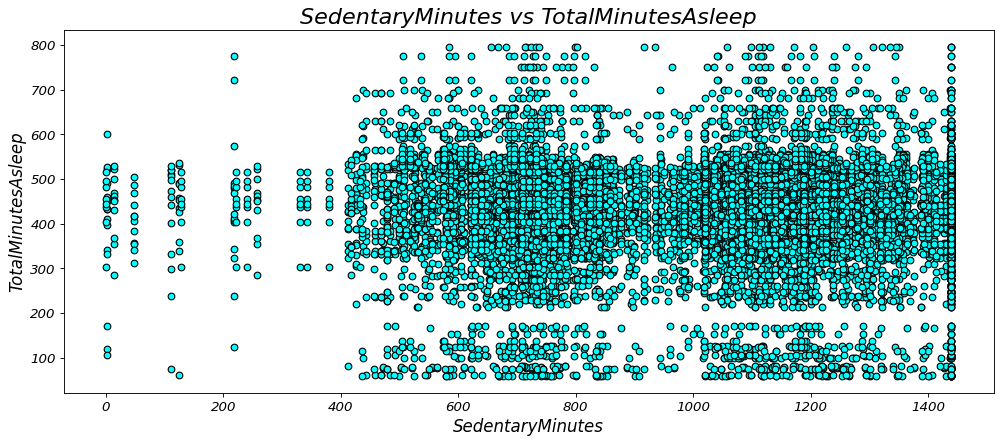

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     TotalMinutesAsleep   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.448
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.229
Time:                        01:04:40   Log-Likelihood:                -77934.
No. Observations:               12582   AIC:                         1.559e+05
Df Residuals:                   12580   BIC:                         1.559e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              423.4990      3.677    115.169      0.000     416.291     430.707
SedentaryMinutes    -0.0043      0.004     -1.203      0.229      -0.011       0.003
==============================================================================
Omnibus:                     1097.085   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2047.603
Skew:                          -0.605   Prob(JB):                         0.00
Kurtosis:                       4.562   Cond. No.                     3.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Overview of SedentaryMinutes vs TotalMinutesAsleep
figure(figsize=(15, 6), dpi=80)
x= df_merged['SedentaryMinutes']
y= df_merged['TotalMinutesAsleep']

plt.scatter(x,y, color="cyan", edgecolor = "black")
plt.title("SedentaryMinutes vs TotalMinutesAsleep",fontsize=20)
plt.ylabel('TotalMinutesAsleep',fontsize=15)
plt.xlabel('SedentaryMinutes',fontsize=15)

plt.show()

#OLS(Ordinary least squares) Regression to estimate the relationship of SedentaryMinutes and TotalMinutesAsleep.
x1= df_merged['SedentaryMinutes']
y= df_merged['TotalMinutesAsleep']

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

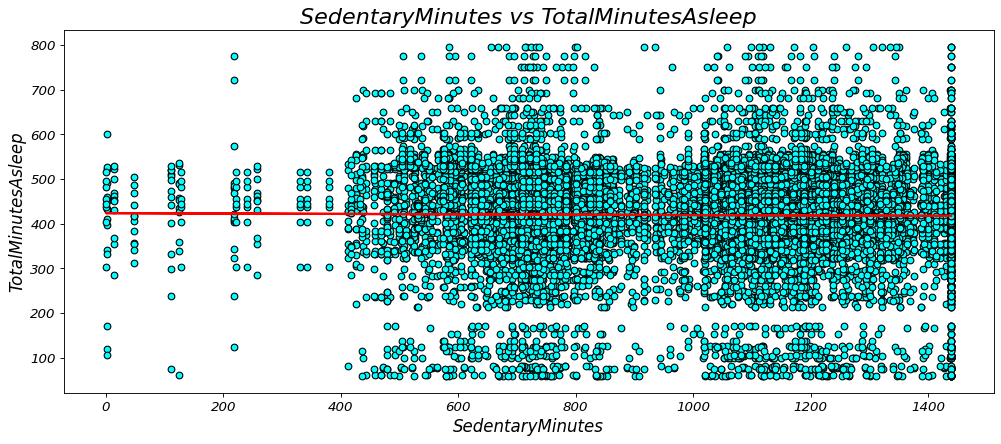

In [47]:
#With the data available, we can plot the regression line by entering the coefficients in the equation y = mx + b.

figure(figsize=(15, 6), dpi=80)
x1= df_merged['SedentaryMinutes']
y= df_merged['TotalMinutesAsleep']

plt.scatter(x1, y, color="cyan", edgecolor = "black")
yhat = -0.0043*x1 + (423.4990) # equation for slope: y = mx + b
fig = plt.plot(x1,yhat, lw=2, c='red', label = 'regression line')
plt.title("SedentaryMinutes vs TotalMinutesAsleep",fontsize=20)
plt.xlabel('SedentaryMinutes',fontsize=15)
plt.ylabel('TotalMinutesAsleep',fontsize=15)
plt.show()

<font size='3'><b>Observation</b></font>

<font size='3'>There is no correlation.

<font size="5"><b>CONCLUSION</b></font>

<font size ="3">By analyzing the data, we've seen that:</font>
* <font size ="3">There is a positive relationship between the total number of steps and the total number of burned calories.
* <font size ="3">The users seem to be consistent with their total steps scores throughout the week. The most active day is Saturday, and the least active is Sunday.
* <font size ="3">The users start their day between 6 am and 8 am. They are most active between 5 pm and 7 pm, and become less active at 8 pm.
* <font size ="3">The highest number of burned calories occur between 5 pm and 7 pm, when the users are most active.
* <font size ="3">Although the average user is very active for over 30 minutes every day, they still spend 81% of their time being sedentary.
* <font size ="3">The users have a consistent sleeping schedule, with an average sleeping time of 419.8 minutes (or 7 hours) per night - with Sunday (7.6 hours) being the day where the users seem to have slept the most.
* <font size ="3">Recording the lowest number of steps and the highest number of minutes asleep, Sunday is likely a rest day chosen by the users.</font>
* <font size ="3">The more idle the user is, the less sleep they will have.</font>

<font size="5"><b>RECOMMENDATIONS</b></font>

<font size="3">The following recommendations were carefully created to help guide Bellabeat's marketing strategy:</font>

* <font size="3">Personalized Notifications to Promote Activity: The users' average of total steps is 7,638 – a mark well below the 10,000 daily steps recommended by the [CDC](https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html). In addition, our analysis has shown that the average user spent about 81% of their day being sedentary. Bellabeat could incorporate personalized notifications on its app to motivate users to keep moving throughout the day. Such notifications could include real-time information regarding the number of steps taken so far, or even the number of steps left in order to reach the daily goal.</font>

* <font size="3">Dynamic Calorie Counter: The app could also provide the user with an elegantly designed, easy-to-use interface that displays the number of calories that are being burned throughout the day to improve motivation. The user could also have the option to set their customized daily calories goal and be able to follow their progress throughout the day.</font>

* <font size="3">Detailed Sleeping Log: The average user has a consistent sleeping schedule, but those who may want to improve the quality of their sleep - or simply keep track of it - could benefit from a sleeping log. The app could offer this feature and record sleep quality, the number of times one wakes up during the night, the total amount of awake time in bed, anxiety, and/or stress levels.</font>

* <font size="3">Weekly and Monthly Achievement Reports: To keep the users motivated, the Bellabeat app could provide customized weekly and monthly reports regarding the total number of steps, burned calories, sleeping habits, weight loss, and total time spent on the different activity levels. The app could send congratulatory messages to those who keep up with good habits, as well as motivational tips for improvement depending on the user's overall performance.</font>

* <font size="3">Meditation and Relaxation Services: The Bellabeat app could also offer meditation and relaxation tips and services - either for free or on a premium basis - to those who are looking to improve their sleep quality and/or reduce stress and anxiety levels. By tracking the time of day when the user decreases their activity levels, their rest days, or perhaps around bedtime, the app could send notifications to the person's phone or smart device and suggest different meditation or relaxation techniques.</font>

* <font size="3">Discounts on Other Bellabeat Wellness Products and Services: Another way to keep customers motivated is to offer special discounts on the different Bellabeat products, as well as their premium membership. This way, the users could become more inclined to get more active and purchase more products from the company.</font>